**EDA**

In [ ]:
#the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [ ]:
#reading the csv files
df1 = pd.read_csv(Train.csv, sep=';')
df1.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,30,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,16,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,17,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [ ]:
#convert loan amount to int
df1['Loan_Amount_Requested'] = df1['Loan_Amount_Requested'].str.replace(',', '')
df1['Loan_Amount_Requested'] = df1['Loan_Amount_Requested'].astype(int)

In [ ]:
#understand the types of variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  int64  
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


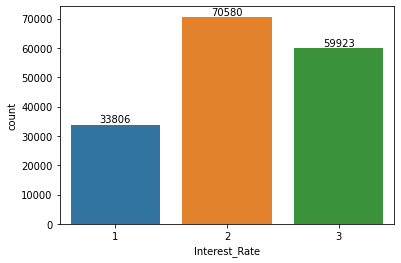

In [ ]:
#bar chart for intereset rate category
c = sns.countplot(df1["Interest_Rate"])
for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (0, 5),
                 textcoords = 'offset points')


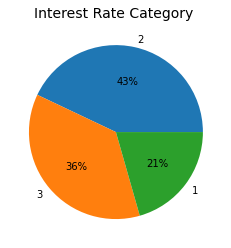

In [ ]:
#pie chart for intereset rate category
plt.pie(df1["Interest_Rate"].value_counts(),labels =df1["Interest_Rate"].value_counts().index,autopct='%.0f%%')
plt.title('Interest Rate Category ',size = 14,)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


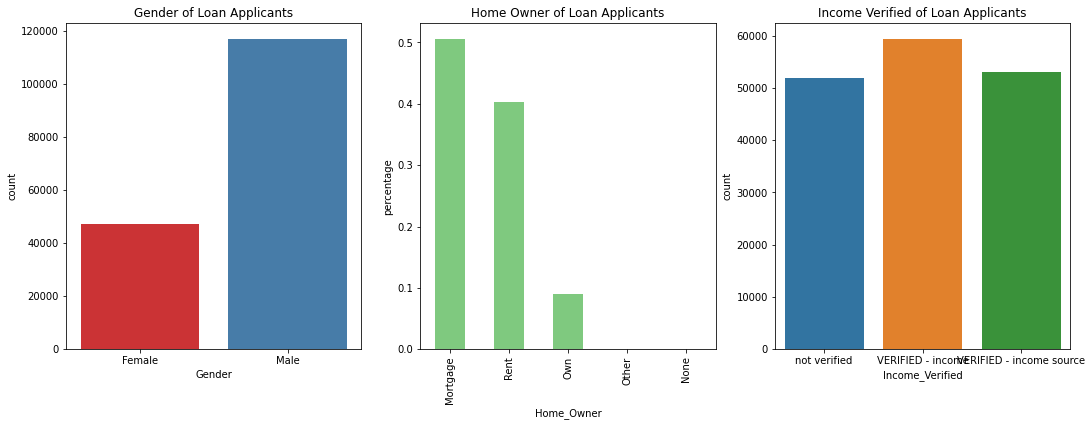

In [ ]:
#bar chart for gender, home owner, income verified
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6)) 
ax = sns.countplot(df1["Gender"], palette="Set1", ax=axes[0] ).set(title='Gender of Loan Applicants')
ax= df1['Home_Owner'].value_counts(normalize=True).plot.bar(ax=axes[1], colormap='Accent',title='Home Owner of Loan Applicants', xlabel='Home_Owner', ylabel= 'percentage')
ax =  sns.countplot(df1["Income_Verified"], ax=axes[2] ).set(title='Income Verified of Loan Applicants')

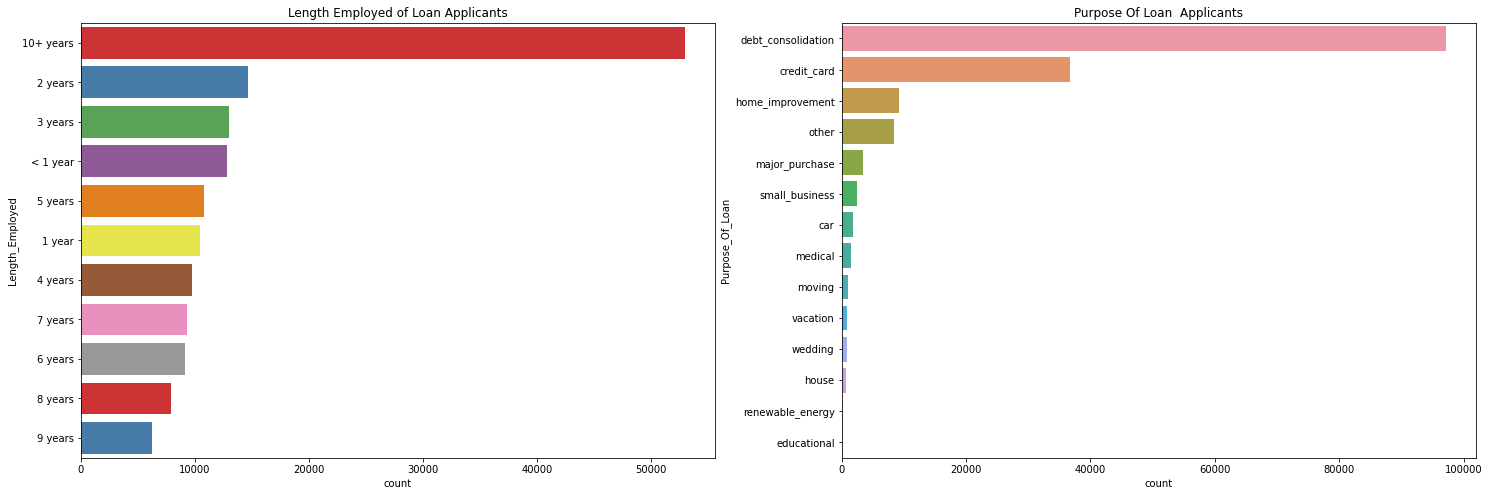

In [ ]:
#bar chart for length employed and purpose of loan
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,8)) 
ax= sns.countplot(y=df1["Length_Employed"],order = df1["Length_Employed"].value_counts().index,  palette="Set1",ax=axes[0]).set(title='Length Employed of Loan Applicants')
ax = sns.countplot(y=df1["Purpose_Of_Loan"],order = df1["Purpose_Of_Loan"].value_counts().index, ax=axes[1]).set(title='Purpose Of Loan  Applicants')

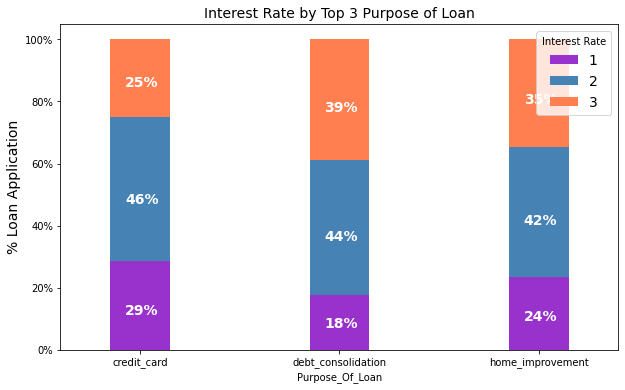

In [ ]:
#grouped bar chart top 3 purpose of loan
dfk = df1[df1.Purpose_Of_Loan == 'debt_consolidation'] 
dfk1 = df1[df1.Purpose_Of_Loan == 'credit_card']
dfk2 = df1[df1.Purpose_Of_Loan == 'home_improvement']
bb = pd.concat([dfk, dfk1,dfk2],
                  ignore_index = True)
colors = ['darkorchid','steelblue','coral']
contract_churn = bb.groupby(['Purpose_Of_Loan','Interest_Rate']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color= colors )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Interest Rate')
ax.set_ylabel('% Loan Application',size = 14)
ax.set_title('Interest Rate by Top 3 Purpose of Loan',size = 14, )

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
                 size = 14)

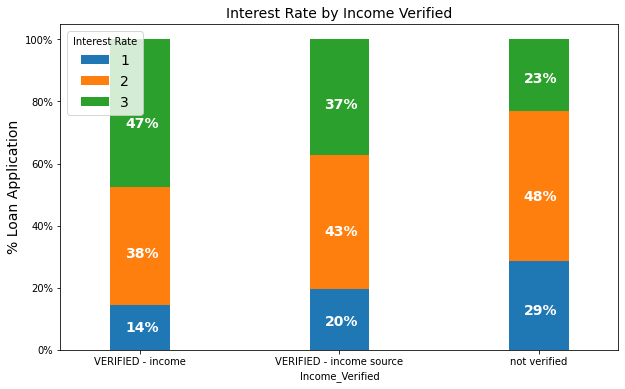

In [ ]:
#grouped bar chart income verified
contract_churn = df1.groupby(['Income_Verified','Interest_Rate']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Interest Rate')
ax.set_ylabel('% Loan Application',size = 14)
ax.set_title('Interest Rate by Income Verified',size = 14, )

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
                 size = 14)

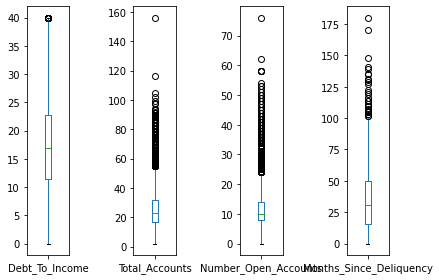

In [ ]:
#boxplot
fig, (ax1, ax2, ax3, ax4)=plt.subplots(ncols=4)
df1['Debt_To_Income'].plot.box(ax=ax1)
df1['Total_Accounts'].plot.box(ax=ax2)
df1['Number_Open_Accounts'].plot.box(ax=ax3)
df1['Months_Since_Deliquency'].plot.box(ax=ax4)
fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

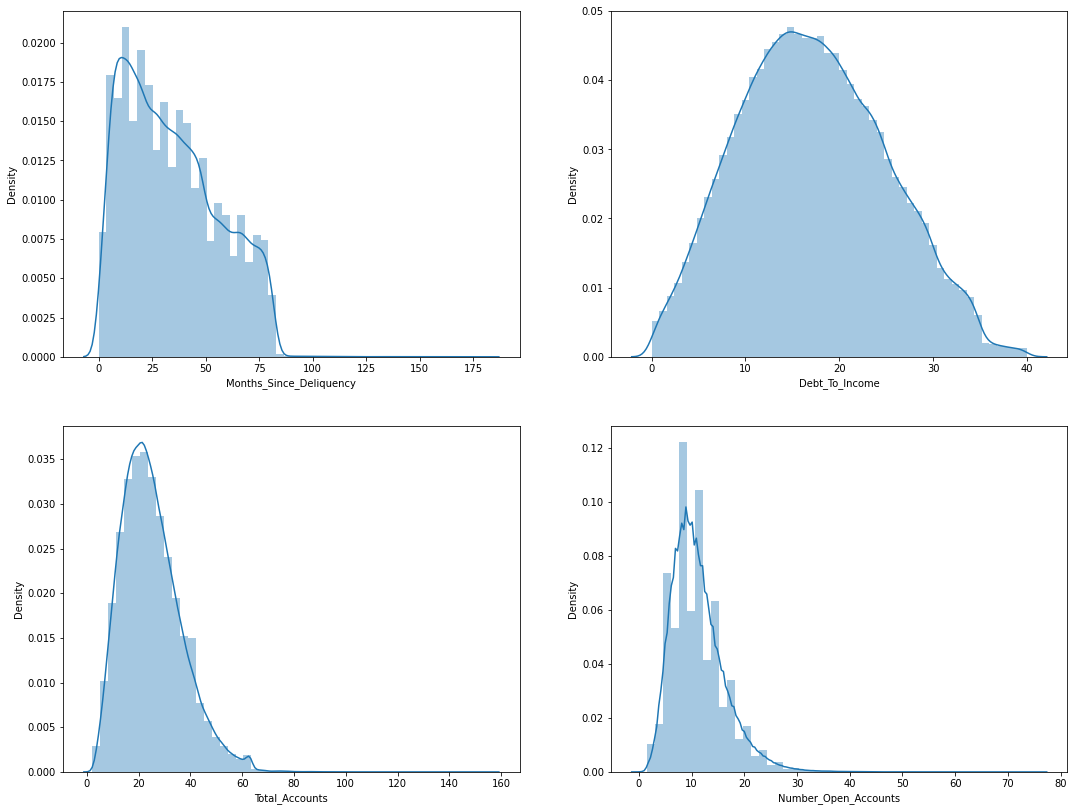

In [ ]:
#distribution plot
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14)) 
ax=sns.distplot(df1['Debt_To_Income'],ax=axes[0,1])
ax = sns.distplot(df1['Months_Since_Deliquency'], ax=axes[0,0])
ax = sns.distplot(df1['Total_Accounts'], ax=axes[1,0])
ax = sns.distplot(df1['Number_Open_Accounts'], ax=axes[1,1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

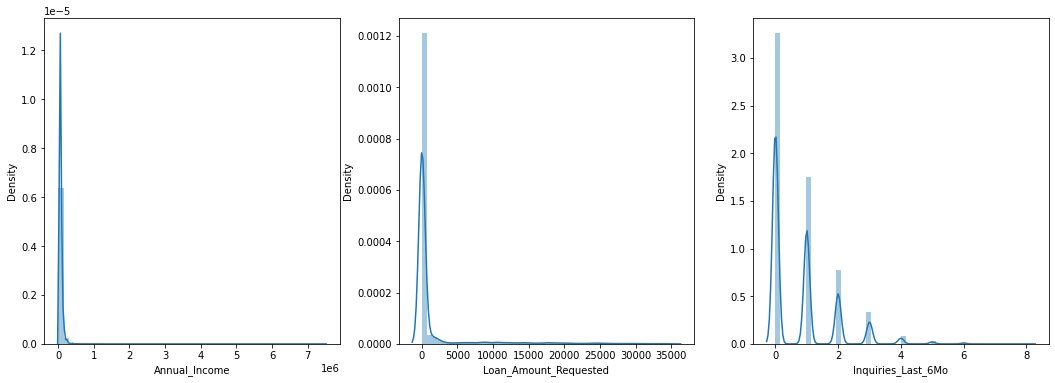

In [ ]:
#distribution plot
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(18,6)) 
ax=sns.distplot(df1['Annual_Income'],ax=axes[0])
ax = sns.distplot(df1['Loan_Amount_Requested'], ax=axes[1])
ax = sns.distplot(df1['Inquiries_Last_6Mo'], ax=axes[2])